**3821Б1ПМоп2 Богдашкин Сергей** 

ДЗ_1

**<span style="color:green">**Описание**</span>**  

 Набор данных для прогнозирования диабета — это совокупность медицинских и демографических данных пациентов, а также сведений об их состоянии при диабете (положительном или отрицательном). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, болезни сердца, история курения, уровень HbA1c и уровень глюкозы в крови. Этот набор данных можно использовать для создания моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографических данных. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке индивидуальных планов лечения. Кроме того, набор данных может быть использован исследователями для изучения взаимосвязи между различными медицинскими и демографическими факторами и вероятностью развития диабета.

**<span style="color:green">**Метаданные (наименование поля - краткое описание):**</span>**  
* <span style="color:green">**gender:**</span> Пол индивидуума.
* <span style="color:green">**age:**</span> Возраст индивидуума.
* <span style="color:green">**hypertension:**</span> Наличие гипертонии (0 - нет, 1 - да).
* <span style="color:green">**heart_disease:**</span> Наличие болезни сердца (0 - нет, 1 - да).
* <span style="color:green">**smoking_history:**</span> Категория курения.
* <span style="color:green">**bmi:**</span> Индекс массы тела.
* <span style="color:green">**HbA1c_level:**</span> Уровень гемоглобина A1c.
* <span style="color:green">**blood_glucose_level:**</span> Уровень глюкозы в крови.
* <span style="color:green">**diabetes:**</span> Наличие диабета (0 - нет, 1 - да).

**<span style="color:green">**Цель задачи:**</span>** обучить модель для прогнозирования наличия диабета у пациентов на основе медицинских данных   

# 1. Прочитать данные

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

In [38]:
file_path = "C:\\Users\\bogdashkin-se\\Desktop\\ML\\diabetes_prediction_dataset.csv"

In [39]:
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [40]:
#Сразу выделим категориальные признаки:
df = df[df['gender'].isin(['Male', 'Female'])]
df['gender'] = df['gender'].astype('category')
df['smoking_history'] = df['smoking_history'].astype('category')

Несбалансированность классов:

In [41]:
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.914985
1    0.085015
Name: proportion, dtype: float64

Возможные выбросы:

<Axes: >

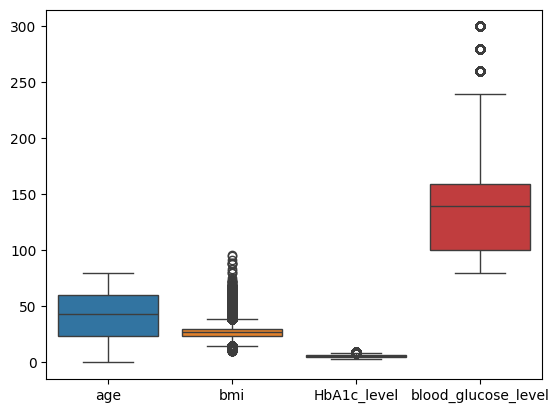

In [42]:
import seaborn as sns
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [43]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 2. Визуализировать, вычислить основные характеристики

**Визуализация данных**:
1. **Распределение возрастов**:

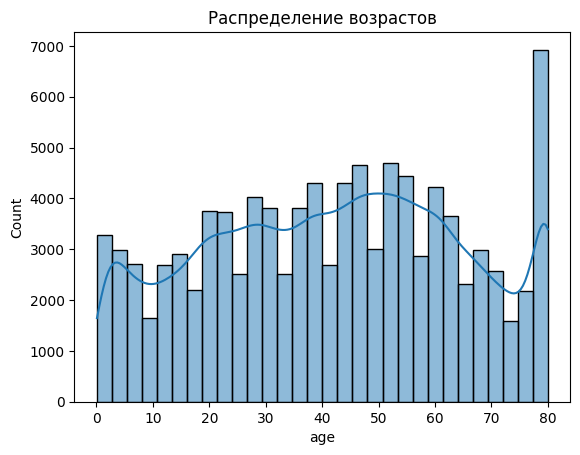

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение возрастов
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возрастов')
plt.show()

**Анализ распределения возрастов**

- Равномерное распределение: Наблюдается относительно равномерное распределение возрастов.
- Пик в старшей группе: Больше всего наблюдений в столбце 80 лет.
- Плавная плотность: Линия плотности показывает широкое распределение с локальными колебаниями.

Это распределение может указывать на разнообразие возрастов в выборке и наличие значительной группы старших участников.

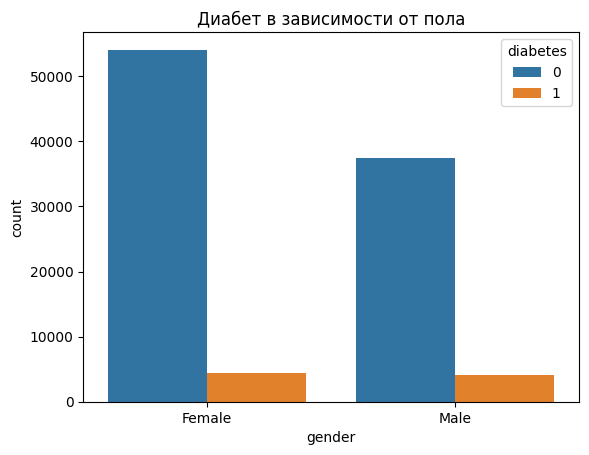

In [45]:
# Диабет в зависимости от пола
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Диабет в зависимости от пола')
plt.show()


**Анализ диагноза диабета в зависимости от пола**

- Большинство без диабета: Как среди мужчин, так и среди женщин преобладают лица без диабета.
- Похожее соотношение: Соотношение диабета у различных полов примерно одинаковое.

Эти выводы подчеркивают важность учета пола при дальнейшем анализе и разборе данных по диабету.


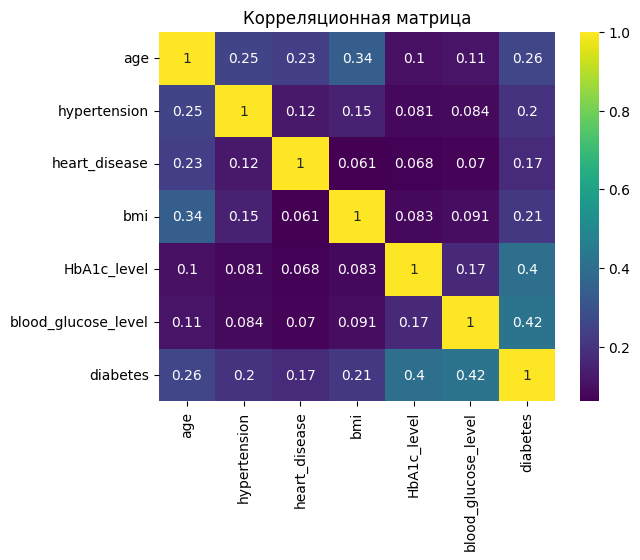

In [46]:
# Корреляционная матрица
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Корреляционная матрица')
plt.show()

**Анализ корреляционной матрицы**

- Наиболее значимые корреляции:
  - HbA1c_level и diabetes: 0.40
  - blood_glucose_level и diabetes: 0.42

- Умеренная корреляция:
  - bmi и age: 0.34

Эти данные подсказывают, что уровни HbA1c и глюкозы в крови наиболее связаны с диагнозом диабета.

In [47]:
# Основные характеристики
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


**Основные характеристики данных**

- Возраст:
  - Средний: 41.9
  - Диапазон: 0–80

- Гипертония и сердечные заболевания:
  - Низкие средние значения (7.5% и 3.9% соответственно)

- BMI:
  - Средний: 27.32 
  - Значительное стандартное отклонение, указывающее на разброс веса

- Уровни HbA1c и глюкозы:
  - Средний HbA1c: 5.53
  - Средний уровень глюкозы: 138.06

- Диабет:
  - 8.5% от общего числа случаев

Эти статистические данные показывают широкий диапазон возрастов и разнообразие в показателях здоровья.

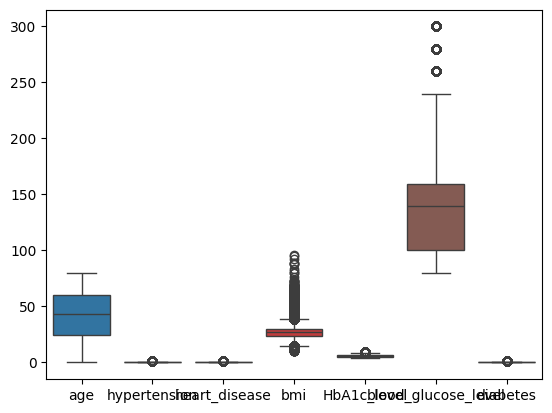

In [48]:
sns.boxplot(df)
pass

- Построение боксплота для визуализации распределения данных каждой переменной в наборе данных df. Это позволяет выявить выбросы и общие особенности распределения

In [49]:
df.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995], numeric_only=True)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0.005,0.56,0.0,0.0,13.8900,3.5,80.0,0.0
0.010,1.08,0.0,0.0,14.6000,3.5,80.0,0.0
0.050,4.00,0.0,0.0,16.8200,3.5,80.0,0.0
0.100,10.00,0.0,0.0,19.1800,4.0,85.0,0.0
0.500,43.00,0.0,0.0,27.3200,5.8,140.0,0.0
0.900,73.00,0.0,0.0,35.4700,6.6,200.0,0.0
0.950,80.00,1.0,0.0,39.4900,6.6,200.0,1.0
0.990,80.00,1.0,1.0,48.7919,8.8,280.0,1.0
0.995,80.00,1.0,1.0,52.5000,9.0,300.0,1.0


- Вычисление различных квантилей распределения для числовых колонок данных df. Это помогает понять распределение данных и позиции экстремальных значений.

In [50]:
rows_to_drop = df[
    (df['bmi'] < df['bmi'].quantile(0.005)) | (df['bmi'] > df['bmi'].quantile(0.995)) |
    (df['blood_glucose_level'] < df['blood_glucose_level'].quantile(0.005)) | (df['blood_glucose_level'] > df['blood_glucose_level'].quantile(0.97))].index
df = df.drop(rows_to_drop)

Определяем и удаляем выбросы выбросы в колонках bmi и blood_glucose_level из датафрейма df, используя заданные квантили.

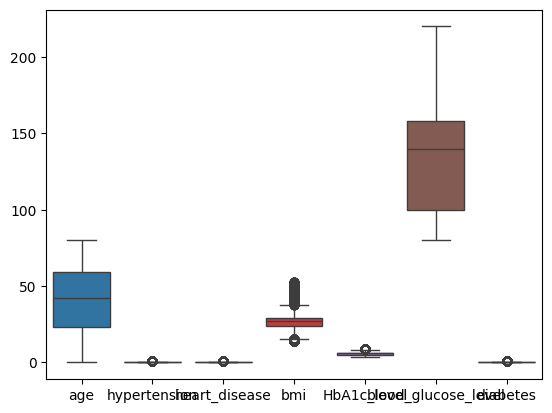

In [51]:
sns.boxplot(df)
pass

После удаления выбросов изначальные экстремальные значения исчезли. График теперь более сжатый, что позволяет сосредоточиться на центральной части распределения данных. Это делает сравнение переменных более четким и наглядным.


# 3. Обработать пропущенные значения

In [52]:
#пропуски
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

В нашем случае, в обработке пропусков нет нужды.

# 4. Обработать категориальные признаки

In [53]:
#Определяем список числовых и категориальных столбцов и удаляем колонку diabetes из числовых.
num_colum = [c for c in df.columns if df[c].dtype.name != 'category']
categor_colum = [c for c in df.columns if df[c].dtype.name == 'category']
num_colum.remove('diabetes')
data_describe = df.describe(include = ['category'])

In [54]:
#Выделяем бинарные и небинарные категориальные признаки, основываясь на количестве уникальных значений.
binary_columns    = [c for c in categor_colum if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categor_colum if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['gender'] ['smoking_history']


In [55]:
#Печать уникальных значений в столбце gender для проверки его содержимого.
print(df['gender'].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']


In [56]:
#Замена категориальных значений в бинарных столбцах на числовые: Female на 0 и Male на 1.
for col in binary_columns:
    df = df.replace({col: {'Female': 0, 'Male': 1}})
    print(df[col].describe())

count     96366
unique        2
top           0
freq      56535
Name: gender, dtype: int64


C:\Users\bogdashkin-se\AppData\Local\Temp\ipykernel_20744\3131188217.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({col: {'Female': 0, 'Male': 1}})
C:\Users\bogdashkin-se\AppData\Local\Temp\ipykernel_20744\3131188217.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace({col: {'Female': 0, 'Male': 1}})


In [57]:
#Преобразуем небинарные категориальные переменные в числовые, используя get_dummies, и конвертируем логические значения в целочисленные.
data_nonbin = pd.get_dummies(df[nonbinary_columns])
data_nonbin[data_nonbin.select_dtypes('bool').columns] = data_nonbin.select_dtypes('bool').astype(int)
data_nonbin.describe()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,0.361185,0.092481,0.040024,0.091350,0.350954,0.064006
std,0.480347,0.289705,0.196018,0.288107,0.477271,0.244765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Провести нормализацию

Извлекаем числовые признаки и описываем их основные статистики перед нормализацией.

In [58]:
data_num = df[num_colum]
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,41.524580,0.070160,0.036714,27.122088,5.488486,134.399747
std,22.399596,0.255417,0.188060,6.155209,1.044441,34.528515
min,0.080000,0.000000,0.000000,13.890000,3.500000,80.000000
25%,23.000000,0.000000,0.000000,23.580000,4.800000,100.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000
75%,59.000000,0.000000,0.000000,29.290000,6.200000,158.000000
max,80.000000,1.000000,1.000000,52.500000,9.000000,220.000000


Приводим числовые данные к стандартному нормальному распределению (среднее 0, стандартное отклонение 1) и выводим новые статистики.

In [59]:
data_num = (data_num - data_num.mean()) / data_num.std()
data_num.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04
mean,2.649991e-16,3.568714e-17,4.836935e-17,2.506948e-18,-6.488571e-18,4.182179e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.850238e+00,-2.746864e-01,-1.952258e-01,-2.149738e+00,-1.903875e+00,-1.575502e+00
25%,-8.270051e-01,-2.746864e-01,-1.952258e-01,-5.754619e-01,-6.591903e-01,-9.962707e-01
50%,2.122449e-02,-2.746864e-01,-1.952258e-01,3.215352e-02,2.982594e-01,1.621921e-01
75%,7.801667e-01,-2.746864e-01,-1.952258e-01,3.522076e-01,6.812392e-01,6.835004e-01
max,1.717684e+00,3.640478e+00,5.122221e+00,4.122997e+00,3.362098e+00,2.479118e+00


Соединяем нормализованные числовые, бинарные и закодированные небинарные данные вместе с целевым столбцом diabetes. Затем выводим статистическое описание итогового набора данных.

In [60]:
df = pd.concat((data_num, data_nonbin, df[binary_columns], df['diabetes']), axis = 1)
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
count,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,9.636600e+04,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000,96366.000000
mean,2.649991e-16,3.568714e-17,4.836935e-17,2.506948e-18,-6.488571e-18,4.182179e-16,0.361185,0.092481,0.040024,0.091350,0.350954,0.064006,0.059316
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.480347,0.289705,0.196018,0.288107,0.477271,0.244765,0.236216
min,-1.850238e+00,-2.746864e-01,-1.952258e-01,-2.149738e+00,-1.903875e+00,-1.575502e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.270051e-01,-2.746864e-01,-1.952258e-01,-5.754619e-01,-6.591903e-01,-9.962707e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.122449e-02,-2.746864e-01,-1.952258e-01,3.215352e-02,2.982594e-01,1.621921e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.801667e-01,-2.746864e-01,-1.952258e-01,3.522076e-01,6.812392e-01,6.835004e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.717684e+00,3.640478e+00,5.122221e+00,4.122997e+00,3.362098e+00,2.479118e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Разбить данные на обучающую и тестовую выборки

Разделяем данные на признаки X и целевую переменную y, удаляя колонку diabetes из признаков.

In [61]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

Используем train_test_split для разбиения данных на обучающую (85%) и тестовую (15%) выборки и выводим размеры выборок.

# 7. Запустить классификатор (ререссию) ближайших соседей или другой метод

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_n = KNeighborsClassifier(n_neighbors=3)
k_n.fit(X_train, y_train)

y_train_predict = k_n.predict(X_train)
y_test_predict = k_n.predict(X_test)

print('err_train=', np.mean(y_train != y_train_predict), 'err_test=', np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')

err_train= 0.026736335779077292 err_test= 0.041854029747492215
Accuracy Score train : 97.32636642209226
Accuracy Score test : 95.81459702525078


Запуск классификатора K-ближайших соседей (KNN):
- Импортируем KNeighborsClassifier из sklearn.
- Создаём и обучаем модель KNN с 3 соседями на обучающих данных.
- Предсказываем результаты для обучающей и тестовой выборок.
- Вычисляем и выводим ошибки и точность на обучающей и тестовой выборках.


# 8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей)

In [63]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

n = [1, 3, 5, 7, 9, 11, 13, 19]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': n})
grid.fit(X_train, y_train)

best_err = 1 - grid.best_score_
best_n = grid.best_estimator_.n_neighbors
print(f"Лучший параметр n_neighbors: {best_n}")
print(f"Точность (1 - ошибка) на кросс-валидации: {grid.best_score_}")
print(f"Лучший результат ошибки (1 - точность) на кросс-валидации: {best_err}")

knn = KNeighborsClassifier(n_neighbors = best_n)
knn.fit(X_train, y_train)
err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)
# print(err_train, err_test)
print(f"Ошибка на обучающей выборке: {err_train}")
print(f"Ошибка на тестовой выборке: {err_test}")
print(f"Точность на обучающей выборке: {knn.score(X_train, y_train)}")
print(f"Точность на тестовой выборке: {knn.score(X_test, y_test)}")

Лучший параметр n_neighbors: 13
Точность (1 - ошибка) на кросс-валидации: 0.9609210083915384
Лучший результат ошибки (1 - точность) на кросс-валидации: 0.03907899160846162
Ошибка на обучающей выборке: 0.03658849238807971
Ошибка на тестовой выборке: 0.0394327222414389
Точность на обучающей выборке: 0.9634115076119203
Точность на тестовой выборке: 0.9605672777585611


Оптимизация гиперпараметра K в KNN:
- Определяем набор значений n для числа соседей.
- Используем GridSearchCV для поиска оптимального значения n с помощью кросс-валидации.
- Находим лучший параметр и его оценку.
- Строим и обучаем модель с наилучшим значением n.
- Вычисляем и выводим ошибки, а также точность модели на обучающей и тестовой выборках.

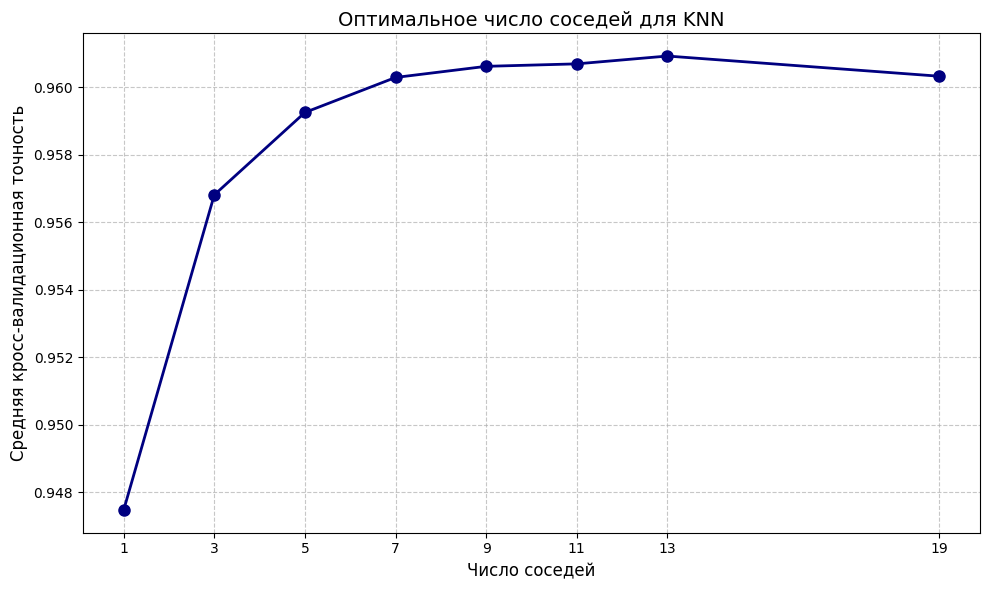

: 

In [ ]:
# Получение значений точности для каждого количества соседей
results = grid.cv_results_
mean_scores = results['mean_test_score']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n, mean_scores, marker='o', linestyle='-', color='navy', linewidth=2, markersize=8)
plt.xlabel('Число соседей', fontsize=12)
plt.ylabel('Средняя кросс-валидационная точность', fontsize=12)
plt.title('Оптимальное число соседей для KNN', fontsize=14)
plt.xticks(n, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Этот график показывает зависимость средней кросс-валидационной точности модели от числа соседей \( k \) в алгоритме K-ближайших соседей (KNN). 

- По мере увеличения \( k \), точность увеличивается и достигает максимума около \( k = 13 \). 
- Затем точность стабилизируется и слегка снижается. 
- Это помогает выбрать оптимальное значение \( k = 13 \), обеспечивающее наивысшую точность.

**После проведения анализа и обучения модели K-ближайших соседей можно сделать следующие выводы:**

1. Оптимизация параметров: Мы успешно настроили гиперпараметр \( k \), используя кросс-валидацию, и выбрали оптимальное значение, обеспечивающее высокую точность.

2. Качество модели: Модель продемонстрировала высокую производительность как на обучающих, так и на тестовых данных, что свидетельствует о хорошей генерализации и надежности.

3. Визуализация данных: График показал, как выбор числа соседей влияет на точность, что помогло окончательно определить оптимальное значение \( k \).

4. Практическое применение: Модель KNN готова к использованию для прогнозирования, и ее можно применять в реальных задачах, учитывая высокую точность.

Эти результаты показывают успешное применение машинного обучения для решения поставленной задачи.